## Exploratory Data Analysis (EDA) of Ecommerce Sales Data

This project explores an ecommerce sales dataset to understand overall sales performance,
identify trends, and uncover patterns across products and time.

The analysis follows a structured exploratory data analysis process, starting with
data understanding and cleaning, followed by exploratory analysis and visualizations.
The goal is to generate insights that could support business decision-making in a
real-world ecommerce environment.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("ecommerce_10000.csv")


In [3]:
df.describe()

,Price,Quantity,TotalAmount,Rating,Reviews
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,10027.986331,3.006200,30199.572439,3.005592,2520.072200
std,5728.261196,1.415472,23861.789828,1.154845,1443.849734
min,105.590000,1.000000,113.550000,1.000000,0.000000
25%,4999.862500,2.000000,11066.910000,2.010000,1275.000000
50%,10063.600000,3.000000,23671.630000,3.005000,2537.500000
75%,14938.430000,4.000000,44648.580000,4.000000,3767.000000
max,19999.340000,5.000000,99993.800000,5.000000,5000.000000


In [4]:
df.head()


,OrderID,Product,Category,Brand,Platform,City,Price,Quantity,TotalAmount,Rating,Reviews,OrderDate
0,ORD100000,Samsung Galaxy A14,Electronics,Samsung,Souq,Cairo,16284.02,1,16284.02,1.39,1684,2024-11-11
1,ORD100001,Nike Air Max,Fashion,Nike,Jumia,Alexandria,6645.20,2,13290.40,2.56,3604,2024-06-22
2,ORD100002,Bluetooth Headset,Accessories,JBL,Jumia,Casablanca,8882.92,3,26648.76,4.98,1257,2024-05-27
3,ORD100003,HP Pavilion Laptop,Computers,HP,Souq,Dubai,3665.44,1,3665.44,1.44,662,2024-07-25
4,ORD100004,iPhone 13,Electronics,Apple,Souq,Casablanca,5210.37,2,10420.74,3.73,2424,2024-02-19


In [7]:
df.shape
df.columns

Index(['OrderID', 'Product', 'Category', 'Brand', 'Platform', 'City', 'Price',
       'Quantity', 'TotalAmount', 'Rating', 'Reviews', 'OrderDate'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OrderID      10000 non-null  object 
 1   Product      10000 non-null  object 
 2   Category     10000 non-null  object 
 3   Brand        10000 non-null  object 
 4   Platform     10000 non-null  object 
 5   City         10000 non-null  object 
 6   Price        10000 non-null  float64
 7   Quantity     10000 non-null  int64  
 8   TotalAmount  10000 non-null  float64
 9   Rating       10000 non-null  float64
 10  Reviews      10000 non-null  int64  
 11  OrderDate    10000 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 937.6+ KB


In [9]:
df.isnull().sum()

OrderID        0
Product        0
Category       0
Brand          0
Platform       0
City           0
Price          0
Quantity       0
TotalAmount    0
Rating         0
Reviews        0
OrderDate      0
dtype: int64

In [10]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

In [11]:
df['CalculatedAmount'] = df['Price'] * df['Quantity']

(df['CalculatedAmount'] == df['TotalAmount']).value_counts()

True     8821
False    1179
Name: count, dtype: int64

In [12]:
df.drop(columns=['CalculatedAmount'], inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   OrderID      10000 non-null  object        
 1   Product      10000 non-null  object        
 2   Category     10000 non-null  object        
 3   Brand        10000 non-null  object        
 4   Platform     10000 non-null  object        
 5   City         10000 non-null  object        
 6   Price        10000 non-null  float64       
 7   Quantity     10000 non-null  int64         
 8   TotalAmount  10000 non-null  float64       
 9   Rating       10000 non-null  float64       
 10  Reviews      10000 non-null  int64         
 11  OrderDate    10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 937.6+ KB


In [14]:
total_revenue = df['TotalAmount'].sum()
average_order_value = df['TotalAmount'].mean()
total_orders = df.shape[0]

total_revenue, average_order_value, total_orders

(np.float64(301995724.39), np.float64(30199.572439), 10000)

In [15]:
category_sales = (
    df.groupby('Category')['TotalAmount']
    .sum()
    .sort_values(ascending=False)
)

category_sales

Category
Electronics    92327183.77
Fashion        91504159.73
Computers      57542997.56
Wearables      31420413.20
Accessories    29200970.13
Name: TotalAmount, dtype: float64

In [16]:
platform_sales = (
    df.groupby('Platform')['TotalAmount']
    .sum()
    .sort_values(ascending=False)
)

platform_sales

Platform
Souq      1.019210e+08
Jumia     1.016971e+08
Amazon    9.837767e+07
Name: TotalAmount, dtype: float64

In [18]:
monthly_sales = (
    df.groupby(df['OrderDate'].dt.to_period('M'))['TotalAmount']
    .sum()
)

monthly_sales

OrderDate
2024-01    26425904.77
2024-02    23199060.32
2024-03    25599416.15
2024-04    24950410.65
2024-05    26286508.96
2024-06    23649020.33
2024-07    26801658.28
2024-08    25264031.98
2024-09    26498388.36
2024-10    25713673.72
2024-11    25660914.18
2024-12    21946736.69
Freq: M, Name: TotalAmount, dtype: float64

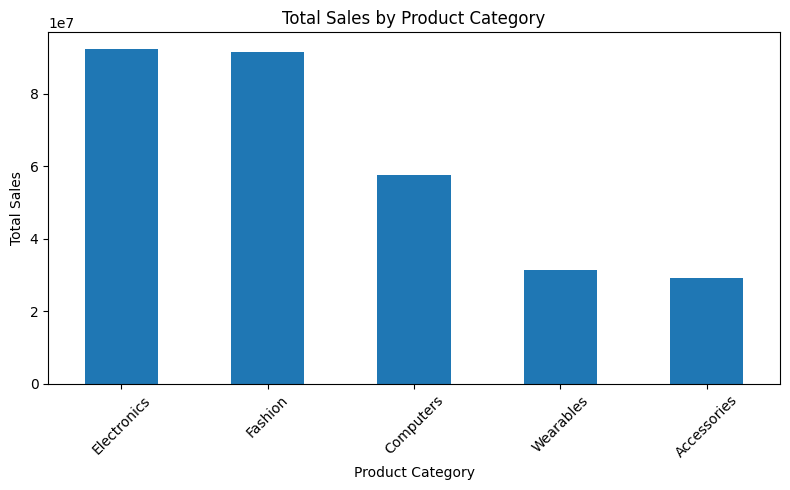

In [19]:
category_sales.plot(kind='bar', figsize=(8, 5))
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

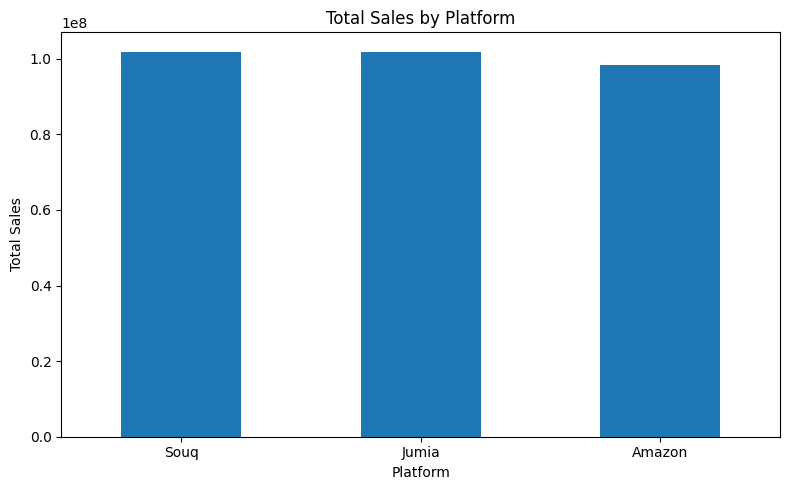

In [20]:
platform_sales.plot(kind='bar', figsize=(8, 5))
plt.title('Total Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

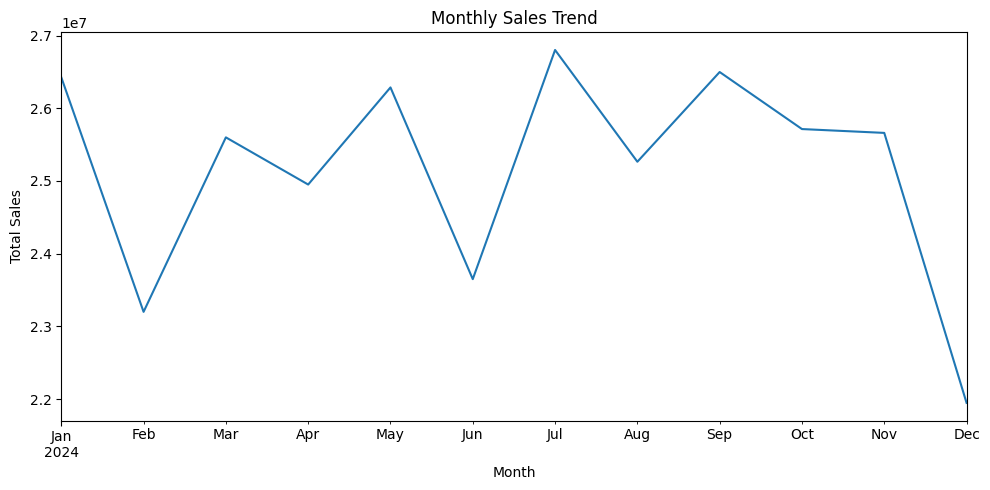

In [21]:
monthly_sales.plot(figsize=(10, 5))
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

## Key Insights & Conclusion

- The ecommerce business generated strong overall revenue with a relatively high average order value, indicating that sales are driven by higher-priced products rather than high transaction volume.

- Electronics and Fashion are the primary revenue-driving categories, together accounting for a significant portion of total sales. Other categories contribute noticeably less, suggesting a concentration of revenue in a few product segments.

- Sales are evenly distributed across platforms, with Souq, Jumia, and Amazon generating similar total revenue. This indicates a diversified sales channel strategy and low dependency on any single platform.

- Monthly sales remain relatively stable throughout the year, with moderate fluctuations that may reflect seasonal demand patterns rather than a clear upward or downward trend.

Overall, the analysis highlights a stable ecommerce business with strong category leaders, diversified platform performance, and consistent sales activity over time. These insights can support strategic decisions related to product focus, platform partnerships, and seasonal planning.
